# Análise de Microdados do ENEM 2022


Fonte de Dados: [INEP Microdados Enem](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

Projeto desenvolvido com o acompanhamento das aulas do canal [Programação Dinâmica](https://www.youtube.com/@pgdinamica).

Na playlist **Análise de Dados em Python**, a Kizzy Terra ensina um projeto completo com introdução a conceitos e bibliotecas amplamente utilizados.


### Como usar os Microdados do Enem sem precisar baixá-los e guardá-los no Drive

* Para evitar que o meu drive fique com pouco espaço devido a datasets muito grandes, busquei uma forma alternativa em que não precisasse baixá-los. Essa solução é válida para datasets em que sabemos que os dados não serão alterados/atualizados, pois atualizações nos dados podem alterar as conclusões que podemos chegar. Como este projeto se trata de uma análise sobre dados do ENEM, sabemos que, após possíveis correções feitas pelo próprio INEP, não haveriam situações em que alterações seriam necessárias.

Utilizando o !wget sem o parâmetro de caminho, o Colab vai baixar o arquivo zip para os arquivos temporários, portanto este download precisará ser refeito toda vez que o ambiente de execução for reiniciado.

A velocidade do download independe da sua conexão. Neste caso, dependerá da conexão do Google e do INEP.

Segue o vídeo que usei como guia: [Como BAIXAR e SALVAR arquivos no Google Colab + Baixando conjuntos de dados de forma automática](https://www.youtube.com/watch?v=sbOnV78uoys&ab_channel=Programa%C3%A7%C3%A3oDin%C3%A2mica)

In [1]:
#Baixando Dataset
!wget -p https://download.inep.gov.br/microdados/microdados_enem_2022.zip --no-check-certificate

--2023-10-19 17:27:12--  https://download.inep.gov.br/microdados/microdados_enem_2022.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 620743592 (592M) [application/zip]
Saving to: ‘download.inep.gov.br/microdados/microdados_enem_2022.zip’

download.inep.gov.b 100%[===================>] 591.99M   694KB/s    in 15m 7s  

2023-10-19 17:42:21 (668 KB/s) - ‘download.inep.gov.br/microdados/microdados_enem_2022.zip’ saved [620743592/620743592]

FINISHED --2023-10-19 17:42:21--
Total wall clock time: 15m 9s
Downloaded: 1 files, 592M in 15m 7s (668 KB/s)


In [2]:
# Descompactando Dataset
!unzip -q /content/download.inep.gov.br/microdados/microdados_enem_2022.zip

O conjunto completo disponibilizado pelo INEP possui várias informações sobre a prova, incluindo editais, gabaritos, manuais, além dos datasets úteis para análises.

Os CSVs relevantes para este tipo de análise estarão na pasta DADOS e seus dicionários estarão na pasta DICIONÁRIO.

In [3]:
# Abrindo microdados
# Para abrir os microdados desta forma, basta copiar o caminho do .csv temporário
import pandas as pd

microdados_enem_2022 = pd.read_csv("/content/DADOS/MICRODADOS_ENEM_2022.csv", sep = ';', encoding = 'ISO-8859-1')

In [4]:
microdados_enem_2022.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [5]:
microdados_enem_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

* São quase 3.5 milhões de entradas no dataset, ou seja, mais de 3 milhões de pessoas que fizeram a prova do ENEM.

* Nem todos os dados serão úteis nesta análise. Para selecionar as variáveis, o dicionário deve ser consultado.

# Filtragem de dados

A princípio, foram removidas as colunas referentes às alternativas escolhidas por cada candidato e os vetores dos gabaritos.

In [6]:
colunasSelecionadasEnem = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

In [7]:
microdadosEnemSelecionado = microdados_enem_2022.filter(items = colunasSelecionadasEnem)
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210057943671,2022,14,M,2,2,1,1,2,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,210057516120,2022,14,M,2,1,1,1,16,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210057280536,2022,5,F,1,2,1,1,2,1,...,498.8,565.3,1,1.0,140.0,200.0,120.0,140.0,160.0,760.0
3,210055724397,2022,6,M,1,3,1,1,2,1,...,357.8,416.0,1,1.0,120.0,40.0,40.0,100.0,20.0,320.0
4,210055097896,2022,4,M,0,3,1,1,1,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Municípios em que as provas foram aplicadas x Quantidade de pessoas que fizeram a prova

In [8]:
coluna_no_municipio_prova = microdadosEnemSelecionado['NO_MUNICIPIO_PROVA']
coluna_no_municipio_prova.value_counts()

São Paulo              147046
Rio de Janeiro         105397
Fortaleza               71714
Brasília                65401
Belém                   59976
                        ...  
Jordão                     57
Brejinho de Nazaré         53
Barra do Turvo             51
Japurá                     48
Fernando de Noronha        36
Name: NO_MUNICIPIO_PROVA, Length: 1712, dtype: int64

## Quantidade de pessoas x Idade

As idades são separadas por faixa etária. Segundo o dicionário:

| Identificador | Faixa etária |
| --------------|--------------|
| 1             | Menor de 17 anos
| 2             | 17 anos
| 3             | 18 anos
| 4             | 19 anos
| 5             | 20 anos
| 6             | 21 anos
| 7             | 22 anos
| 8             | 23 anos
| 9             | 24 anos
| 10            | 25 anos
| 11            | Entre 26 e 30 anos
| 12            | Entre 31 e 35 anos
| 13            | Entre 36 e 40 anos
| 14            | Entre 41 e 45 anos
| 15            | Entre 46 e 50 anos
| 16            | Entre 51 e 55 anos
| 17            | Entre 56 e 60 anos
| 18            | Entre 61 e 65 anos
| 19            | Entre 66 e 70 anos
| 20            | Maior de 70 anos


In [135]:
# Renomeação das faixas etárias para melhorar a legibilidade
coluna_tp_faixa_etaria = microdadosEnemSelecionado['TP_FAIXA_ETARIA']

faixas_etarias = { 1:'16-', 2:'17', 3:'18', 4: '19', 5:'20', 6:'21', 7:'22', 8:'23', 9:'24', 10:'25',
                  11:'26~30', 12:'31~35', 13:'36~40', 14:'41~45', 15:'46~50', 16:'51~55',
                  17:'56~60', 18:'61~65', 19:'66~70', 20:'71+' }

coluna_tp_faixa_etaria = coluna_tp_faixa_etaria.map(faixas_etarias)

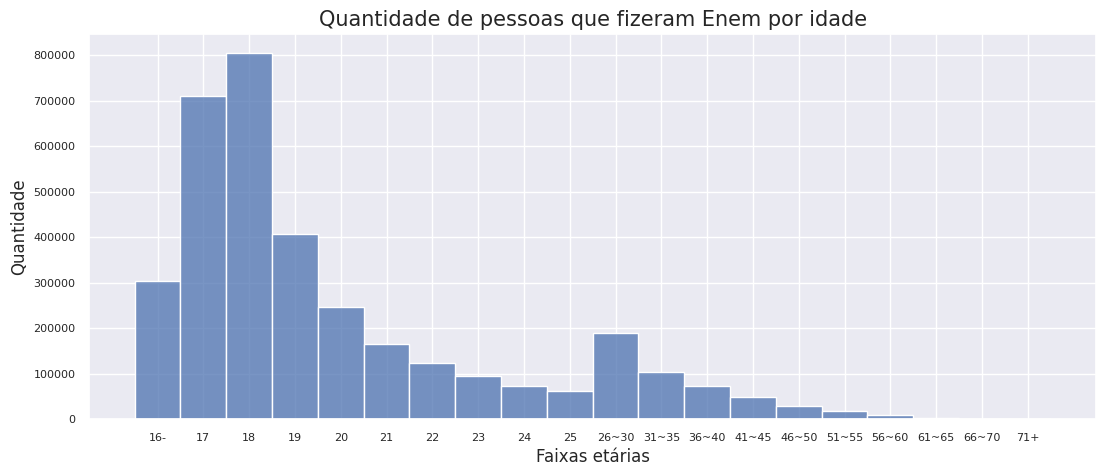

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
plt.figure(figsize = (13,5))
ax = sns.histplot(data = coluna_tp_faixa_etaria.sort_values())
ax.set_title("Quantidade de pessoas que fizeram Enem por idade", fontsize = 15)
plt.xlabel("Faixas etárias", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 12)
ax.tick_params(labelsize = 8)

* A idade mais comum entre os candidatos é de 18 anos.
* Dentre os intervalos de idade, há mais candidaturas de pessoas com 16 anos ou menos do que nos intervalos mais altos, de 26 anos em diante. É possível que boa parte dessas pessoas sejam alunos de ensino médio incompleto que ainda não podem fazer ensino superior, ou seja, estão fazendo vestibular como treineiros.

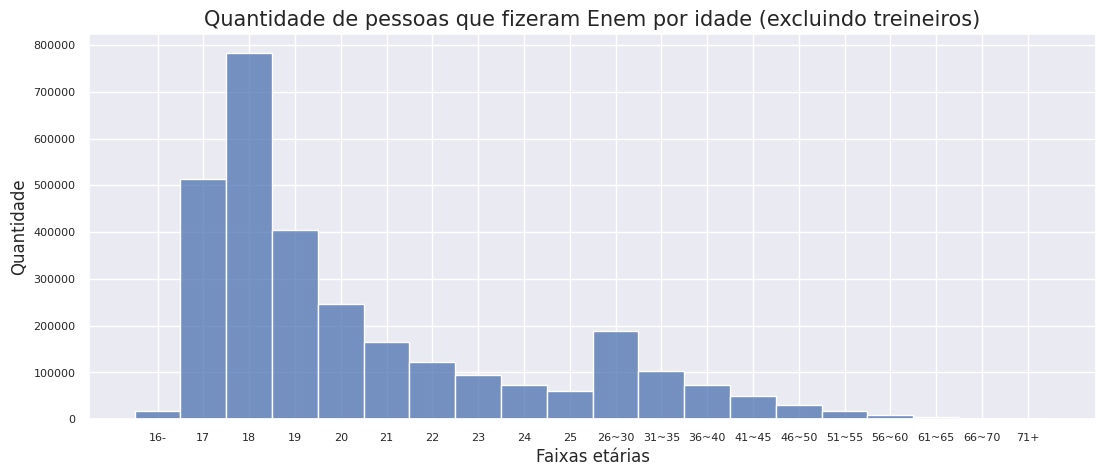

In [141]:
faixa_etaria_exc_treineiros = microdadosEnemSelecionado.query('IN_TREINEIRO == 0')['TP_FAIXA_ETARIA']
faixa_etaria_exc_treineiros = faixa_etaria_exc_treineiros.map(faixas_etarias)

sns.set_theme(style="darkgrid")
plt.figure(figsize = (13,5))
ax = sns.histplot(data = faixa_etaria_exc_treineiros.sort_values())
ax.set_title("Quantidade de pessoas que fizeram Enem por idade (excluindo treineiros)", fontsize = 15)
plt.xlabel("Faixas etárias", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 12)
ax.tick_params(labelsize = 8)

* Desconsiderando-se os treineiros, o pico de idade permanece aos 18 anos. A maior parte dos candidatos de 16 anos ou menos desaparece, bem como boa parte dos candidatos de 17 anos.

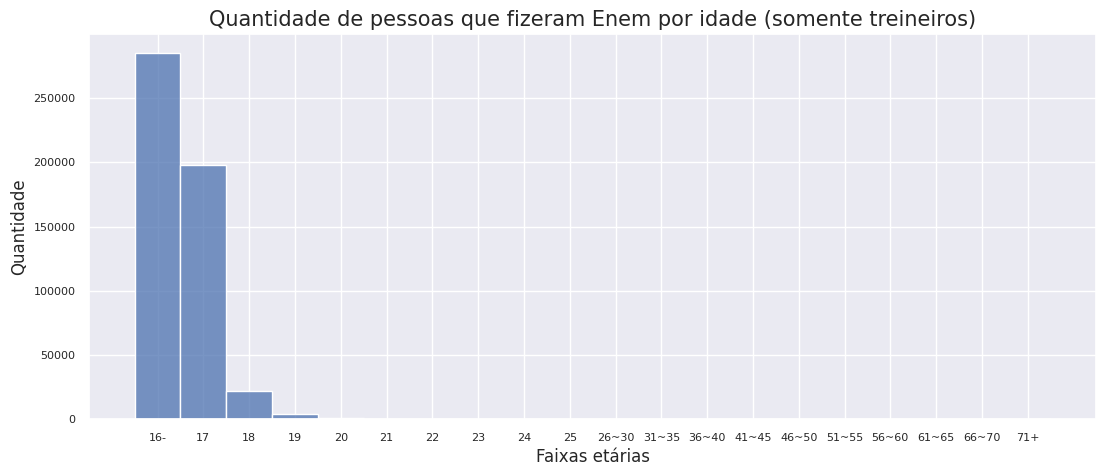

In [143]:
faixa_etaria_treineiros = microdadosEnemSelecionado.query('IN_TREINEIRO == 1')['TP_FAIXA_ETARIA']
faixa_etaria_treineiros = faixa_etaria_treineiros.map(faixas_etarias)

sns.set_theme(style="darkgrid")
plt.figure(figsize = (13,5))
ax = sns.histplot(data = faixa_etaria_treineiros.sort_values())
ax.set_title("Quantidade de pessoas que fizeram Enem por idade (somente treineiros)", fontsize = 15)
plt.xlabel("Faixas etárias", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 12)
ax.tick_params(labelsize = 8)

## Candidatos x Estado

In [144]:
coluna_sg_uf_prova = microdadosEnemSelecionado['SG_UF_PROVA']
coluna_sg_uf_prova.value_counts()

SP    544442
MG    309781
BA    265166
RJ    250890
CE    226377
PA    202621
PE    189595
RS    152295
PR    150396
GO    141622
MA    132916
PB    103238
RN     88049
PI     84400
SC     82791
AM     80986
DF     65401
AL     63945
ES     63700
MT     59381
SE     58312
MS     44683
RO     31969
TO     29440
AP     22674
AC     22601
RR      8434
Name: SG_UF_PROVA, dtype: int64

* O estado com maior número de participantes é São Paulo, que possui também a maior população do país. Os estados seguintes são Minas Gerais, Bahia e Rio de Janeiro, em ordem decrescente.

* Entretanto, segundo o Censo do IBGE 2022, os três estados mais populosos são SP, MG e RJ, havendo uma inversão nas posições de Bahia e Rio de Janeiro.

Fonte: [IBGE Agência de Notícias](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/37237-de-2010-a-2022-populacao-brasileira-cresce-6-5-e-chega-a-203-1-milhoes)

## Comparação entre participantes por estado e estados mais populosos

Esta é uma simplificação dos dados disponibilizados pelo Censo do IBGE 2022.

Fonte original: [Censo Demográfico 2022](https://www.ibge.gov.br/estatisticas/sociais/trabalho/22827-censo-demografico-2022.html?=&t=resultados)

In [145]:
# População por UF em ordem decrescente
sheet_id = "1QpvR4C8oYNulS9PD9Eal2Aj7e4I7ez9i"
sheet_name = "Resumo"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

populacao_por_UF = pd.read_csv(url, thousands = '.', dtype = {'População': int})[['UF', 'População']]
populacao_por_UF['População'] = populacao_por_UF['População'].replace(".", "")
populacao_por_UF = populacao_por_UF.sort_values('População', ascending = False).reset_index(drop = True)
populacao_por_UF.head()

,UF,População
0,SP,44420459
1,MG,20538718
2,RJ,16054524
3,BA,14136417
4,PR,11443208


In [146]:
# Participantes do Enem por UF em ordem decrescente
participantes_enem_por_uf = pd.DataFrame(coluna_sg_uf_prova.value_counts()).reset_index()
participantes_enem_por_uf.rename(columns = {'index':'UF', 'SG_UF_PROVA':'Participantes Enem'}, inplace = True)
participantes_enem_por_uf = participantes_enem_por_uf.sort_values('Participantes Enem', ascending = False).reset_index(drop = True)
participantes_enem_por_uf.head()

,UF,Participantes Enem
0,SP,544442
1,MG,309781
2,BA,265166
3,RJ,250890
4,CE,226377


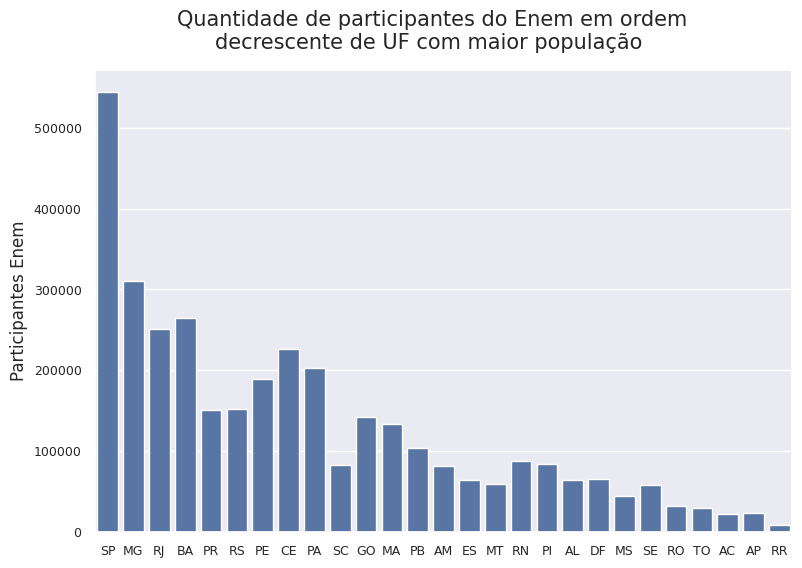

In [147]:
# Merge dos dois dataframes pelo UF
uf_populacao_participantes_enem = populacao_por_UF.merge(participantes_enem_por_uf)

# Inicialização do matplotlib figure
fig, ax = plt.subplots(figsize = (9,6))

fig.suptitle('Quantidade de participantes do Enem em ordem\ndecrescente de UF com maior população ',
             fontsize = 15)

sns.barplot(data = uf_populacao_participantes_enem, x = 'UF', y = 'Participantes Enem', color = 'b')
ax.set(xlabel = '')
ax.tick_params(labelsize = 9)

plt.show()

In [148]:
# Criação de coluna de porcetagem de participantes do Enem em cada estado
uf_populacao_participantes_enem['% Participação'] = (uf_populacao_participantes_enem['Participantes Enem']*100) / uf_populacao_participantes_enem['População']
uf_populacao_participantes_enem['% Participação'] = uf_populacao_participantes_enem['% Participação']
#uf_populacao_participantes_enem

In [149]:
# Criação de coluna com nome das regiões a qual cada estado pertence
regioes = {
        'UF': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE',
               'AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO',
               'DF', 'GO', 'MT', 'MS',
               'ES', 'MG', 'RJ', 'SP',
               'PR', 'RS', 'SC'
               ],
    'Região': ['Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste',
               'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte',
               'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste',
               'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste',
               'Sul', 'Sul', 'Sul'
               ]
}
regioes_por_estado = pd.DataFrame(regioes)

# União dos dataframes das participações no Enem com nomes das regiões
uf_populacao_participantes_enem = uf_populacao_participantes_enem.merge(regioes_por_estado)
#uf_populacao_participantes_enem

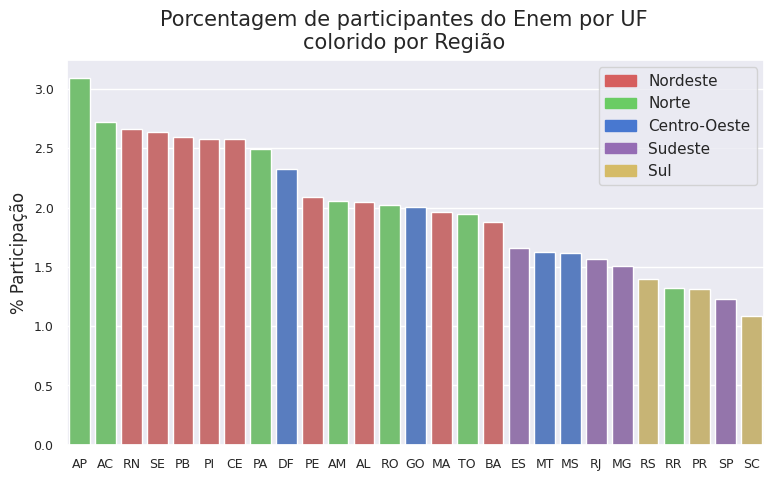

In [150]:
import matplotlib.patches as mpatches

# Mapeamento de cores para as barras de acordo com a região
def mapear_cores(regiao):
    if regiao == 'Nordeste':
        return '#D65F5F'
    elif regiao == 'Norte':
        return '#6ACC64'
    elif regiao == 'Centro-Oeste':
        return '#4878D0'
    elif regiao == 'Sudeste':
        return '#956CB4'
    elif regiao == 'Sul':
        return '#D5BB67'
    else:
        return 'gray'

# Plot do gráfico, ordenado por porcentagens decrescentes de participantes do Enem
# por UF e colorido por Região
fig, ax = plt.subplots(figsize = (9,5))
fig.suptitle('Porcentagem de participantes do Enem por UF\ncolorido por Região',
             fontsize = 15)
sns.barplot(data = uf_populacao_participantes_enem.sort_values('% Participação', ascending = False), x = 'UF', y = '% Participação',
            palette = uf_populacao_participantes_enem.sort_values('% Participação', ascending = False)['Região'].apply(mapear_cores))
ax.set(xlabel = '')
ax.tick_params(labelsize = 9)

# Legenda de cor por Região
nordeste = mpatches.Patch(color='#D65F5F', label='Nordeste')
norte = mpatches.Patch(color='#6ACC64', label='Norte')
centro_oeste = mpatches.Patch(color='#4878D0', label='Centro-Oeste')
sudeste = mpatches.Patch(color='#956CB4', label='Sudeste')
sul = mpatches.Patch(color='#D5BB67', label='Sul')

plt.legend(handles=[nordeste, norte, centro_oeste, sudeste, sul])

plt.show()

Neste gráfico, podemos ver o maior interesse de habitantes das reigões Norte e Nordeste em fazer as provas do Enem.

* Importante lembrar que nem todos os que têm interesse em se candidatar comparecem em todas as provas.

* [TO-DO] Identificação e Remoção de Candidatos desistentes